# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

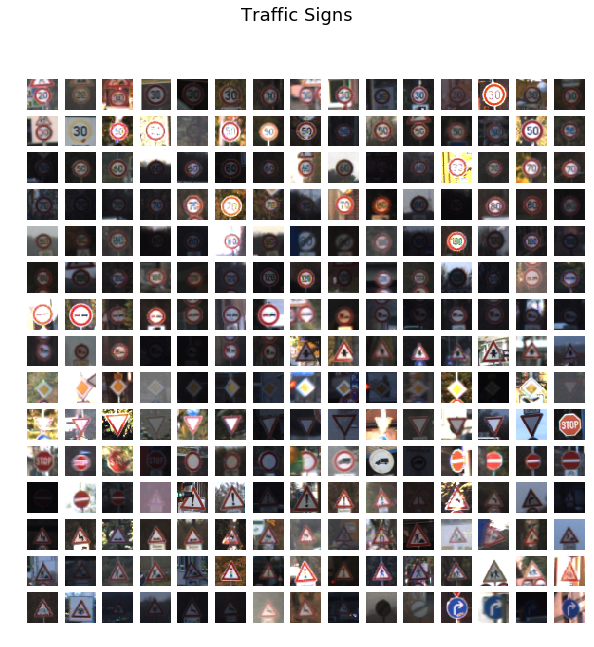

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline
grid_size_x = 15
grid_size_y = 15
total_images = grid_size_x*grid_size_y

gs1 = gridspec.GridSpec(grid_size_x, grid_size_y)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
fig = plt.figure(figsize=(10,10))
fig.suptitle('Traffic Signs', fontsize=18)

i=0
for index in range(0, len(X_train),150):
    image = X_train[index].squeeze()
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    plt.subplot(grid_size_x,grid_size_y,i+1)
    plt.imshow(image)
    plt.axis('off')
    i+=1
    if i>=total_images:
        break

plt.show()


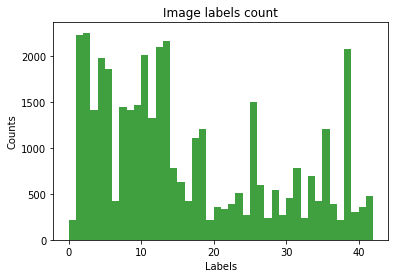

In [4]:
n, bins, patches = plt.hist(train["labels"], bins = list(range(0, 43, 1)),normed=0, facecolor='green', alpha=0.75)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Image labels count')
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2
import numpy as np

clahe = cv2.createCLAHE()
def rgb2normGray(arr):
    '''
    This function takes as input an array of rgb images and converts them to grayscale.
    After normalization it outputs an array of normalized grayscaled images.    
    '''
    output_array = np.empty([arr.shape[0],arr.shape[1], arr.shape[2]])
    for ind,img in enumerate(arr):
        # Convert to gray
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        # Normalize
        norm = (gray - 128.0)/128.0
        #norm = clahe.apply(gray)
        output_array[ind] = norm
    # Add new axis to match dimensions with the NN
    output_array = output_array[...,np.newaxis]
    return output_array

# Apply transformations to both the train and test set
X_train = rgb2normGray(X_train)
X_test = rgb2normGray(X_test)
# Shuffle the dataset    
X_train, y_train = shuffle(X_train, y_train)

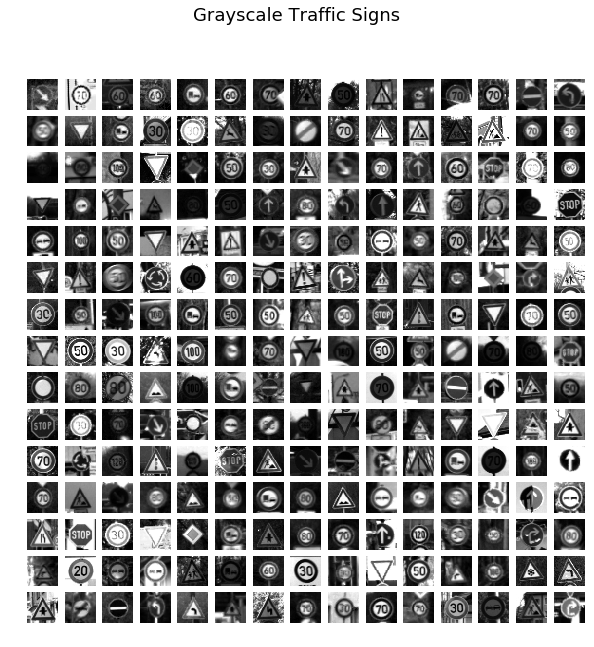

In [6]:
# New dataset visualization
%matplotlib inline
grid_size_x = 15
grid_size_y = 15
total_images = grid_size_x*grid_size_y

gs1 = gridspec.GridSpec(grid_size_x, grid_size_y)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
fig = plt.figure(figsize=(10,10))
fig.suptitle('Grayscale Traffic Signs', fontsize=18)

i=0
for index in range(0, len(X_train),150):
    image = X_train[index].squeeze()
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    plt.subplot(grid_size_x,grid_size_y,i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    i+=1
    if i>=total_images:
        break

plt.show()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**I tried a lot of techniques like conversion from RGB to YUV but the best result achieved by using grayscale conversion. After grayscale conversion i applied normalization. Normalization change the dynamic range of the images revealing more details like edges. One of the normalizations that was tested is called: "Contrast-limited Adaptive Histogram Equalization" but with no expected results.

In [11]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import math
'''This section is not used in the final report. The code below has been tested for many trial and error attempts'''

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def add_data(x_train_data,y_train_data):
    '''
    This function adds data to the initial data set. It finds out the label with the 
    maximum count of values and for every other label it produces transformed images
    to reach this value.
    '''
    image_shape = x_train_data[0].shape
    if (len(image_shape) == 2): 
        image_shape = (image_shape[0], image_shape[1], 1)
    print (image_shape)
    x_train_r = x_train_data
    y_train_r = y_train_data
    bins = np.unique(y_train_data)
    n = np.bincount(y_train_data)
    max_count = int(n[np.argmax(n)])
    
    for bin_index,bin_class in enumerate(bins):
        
        if bin_class == max_count:
            continue
        print ("Processing class label: %s"%bin_class)
        entries_to_reach_class_size = max_count-int(n[bin_index])
        if entries_to_reach_class_size <= 0:
            continue
        # Initialize arrays
        #x_train_add = np.empty([entries_to_reach_class_size,image_shape[0],image_shape[1],image_shape[2]])
        x_train_add = [np.random.random((image_shape[0], image_shape[1], image_shape[2])) for i in range(entries_to_reach_class_size)]
        y_train_add = np.empty([entries_to_reach_class_size])
        i=0
        while (entries_to_reach_class_size>0):
            # Find indices with the specific class label
            class_indices = np.asarray(np.where(y_train_data == bin_class)).flatten()
            # Pick a random index of the specific class
            random_index = class_indices[int(random.random() * class_indices.size)]
            image = x_train_data[random_index]
            # Transform the image
            n_img = transform_image(image,180,2*math.pi,10)
            #n_img = n_img[np.newaxis,...]
            x_train_add[i] = n_img
            #print (x_train_add[i].shape)
            #plt.figure(i)
            #plt.imshow(x_train_add[i])
            y_train_add[i] = bin_class           
            entries_to_reach_class_size -=1
            i +=1
            #x_train_r = np.concatenate((x_train_r, n_img[np.newaxis,...]),axis=0)
            #y_train_r = np.concatenate((y_train_r, bin_class[np.newaxis,...]))
        x_train_add_np = np.asarray(x_train_add)
        #print (x_train_add_np.shape)
        x_train_r = np.concatenate((x_train_r, x_train_add_np),axis=0)
        #print (x_train_r.shape)
        y_train_r = np.concatenate((y_train_r, y_train_add))
    return x_train_r,y_train_r

#print ("Train set shape before adding data: %s"%y_train.shape)
#X_train, y_train = add_data(X_train,y_train)
#print ("Train set shape after adding data: %s"%y_train.shape)

#n, bins, patches = plt.hist(y_train, bins = list(range(0, 43, 1)),normed=0, facecolor='green', alpha=0.75)
#plt.xlabel('Labels')
#plt.ylabel('Counts')
#plt.title('Image labels count after adding data')
#plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Shuffle the dataset
X_train, y_train = shuffle(X_train, y_train)
# Split to validation and testing set
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
#print("Shape of the training set: ", X_train.shape)
#print("Shape of the validation set: ", X_validation.shape)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** The test data is intact. However to create the validation set i used the StratifiedShuffleSplit for k=10 splits. The training set is 99% of the initial training set whereas the validation only 1% of that. In each split different indices of data form the train and validation set but in any case they maintain the 99% - 1% analogy. The initial training set has 39209 values and if we check the histogram we will see very unbalanced data. This means that the NN will have more examples to train for specific classes in comparison with others. This means the weights will be trained in favor of the most common classes and may result to overfitting. Generally unbalanced data is unwanted for training.

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf


from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The model architecture is the same as the Lenet architecture. It is constituted by 2 convolutional layers and 3 fully connected layers. At first, i added one more convolutional layer to allow the NN to identify complex shapes. However i realized that the model could never achieve high validation accuracy and was overfitted very quickly. I also omitted one fully connected layer with similar results so i ended up with the initial solution. 

My model uses the LeNet lab as a starting point:
- Input 32X32X1 (grayscale)
- Conv layer (filter: 5X5X1, stride 1 to 28X28X6)
- Relu
- maxpool (2X2 kernel, 2X2 stride)
- Conv layer (5X5X6 filter, stride 1 to 14X14X6)
- Relu
- Maxpool (2X2 kernel, 2X2 stride)
- Flatten 400 nodes
- Fully connected layer (400 -> 120)
- Fully connected layer (120 -> 84)
- Output (84 -> 43)

In [22]:
### Train your model here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.01, train_size=0.99)

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

EPOCHS = 3
BATCH_SIZE = 128
rate = 0.002

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    XX_train = X_train
    yy_train = y_train
    print("Training...")
    print()
    for train_index, test_index in sss.split(XX_train, yy_train):
        X_train, X_validation = XX_train[train_index], XX_train[test_index]
        y_train, y_validation = yy_train[train_index], yy_train[test_index]
        print ("New set")
        num_examples = len(X_train)

        
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            validation_accuracy = evaluate(X_validation, y_validation)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    

Training...

New set
EPOCH 1 ...
Validation Accuracy = 0.864

EPOCH 2 ...
Validation Accuracy = 0.955

EPOCH 3 ...
Validation Accuracy = 0.942

New set
EPOCH 1 ...
Validation Accuracy = 0.976

EPOCH 2 ...
Validation Accuracy = 0.979

EPOCH 3 ...
Validation Accuracy = 0.990

New set
EPOCH 1 ...
Validation Accuracy = 0.992

EPOCH 2 ...
Validation Accuracy = 0.982

EPOCH 3 ...
Validation Accuracy = 0.987

New set
EPOCH 1 ...
Validation Accuracy = 0.990

EPOCH 2 ...
Validation Accuracy = 0.992

EPOCH 3 ...
Validation Accuracy = 0.984

New set
EPOCH 1 ...
Validation Accuracy = 0.992

EPOCH 2 ...
Validation Accuracy = 0.987

EPOCH 3 ...
Validation Accuracy = 0.982

New set
EPOCH 1 ...
Validation Accuracy = 0.995

EPOCH 2 ...
Validation Accuracy = 0.987

EPOCH 3 ...
Validation Accuracy = 0.997

New set
EPOCH 1 ...
Validation Accuracy = 0.987

EPOCH 2 ...
Validation Accuracy = 1.000

EPOCH 3 ...
Validation Accuracy = 0.995

New set
EPOCH 1 ...
Validation Accuracy = 1.000

EPOCH 2 ...
Validatio

In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.915


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** 
Optimizer: I chose Adam Optimizer since it is more sophisticated than the simple gradient descend optimizer. The most important feature is the larger effective step size where the algorithm will converge to this step size without fine tuning. In the gradient descend optimizer more fine tuning is required to achieve the same convergence rate.

The batch size is 128. According to stochastic gradient descend more data depict better the trend. Generally the smaller the batch the less accurate the estimate of the gradient will be. However the smaller the batch size the quicker the gradient will be updated.

Epochs: This parameter is dependent on the learning rate and vice versa. The lower the learning rate the larger the epoch number will be for optimal solution. Generally via trial and error i chose this parameter so my NN does not overfit. After a lot of experiments 3 epochs selected for every split in the training data. Totally 10 splits X 3 epochs each = 30 epochs. 

Learning rate: This parameter has been chosen in respect of accuracy. Higher learning rate will result to faster convergence but may never reach the level of accuracy a lower value may achieve. So this value has been chosen with trial and error attempts

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I have played along with the parameters and tried to find out the optimal point. Firstly i chose a big enough learning rate to see in general how my NN performs. A trial and error approach was used. Next, i chose a lower learning rate since my NN was converging very quickly to a value without the wanted level of accuracy. The number of epochs has been changed a lot of times since after a specific point the NN was overfitted and the validation accuracy was fluctuating. The optimal solution is the point where the model reaches the higher validation accuracy without big fluctuations. Fluctuations in validation accuracy with an increasing trend may be caused due to small validation dataset in comparison with the training set or generally small training set. Unbalanced data may also contribute to that. Finally after experimenting with the number of splits for StratifiedShuffleSplit and number of epochs for each split and taking account of the test error in new images i came out with the final solution.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.image as mpimg
import glob
import matplotlib.pyplot as plt
import scipy

image_list = []

for filename in glob.glob('web signs images/*.jpg'):
    im= mpimg.imread(filename)
    # Resize image
    image = scipy.misc.imresize(im, (32,32,3))
    # Convert to grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    # Normalize
    image = (gray - 128.0)/128.0
    #image = clahe.apply(gray)
    image_list.append(image)

total = len(image_list)
imagesTogetherNP=np.asarray(image_list)
imagesTogetherNP = imagesTogetherNP[...,np.newaxis]


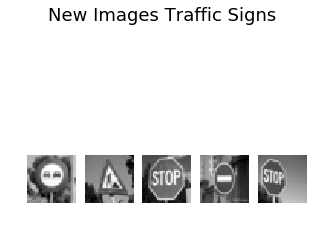

In [25]:
%matplotlib inline
grid_size_x = 1
grid_size_y = 5
total_images = grid_size_x*grid_size_y

gs1 = gridspec.GridSpec(grid_size_x, grid_size_y)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
fig = plt.figure(figsize=(5,5))
fig.suptitle('New Images Traffic Signs', fontsize=18)

i=0
for index in range(0, len(X_train),1):
    image = image_list[index].squeeze()
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    plt.subplot(grid_size_x,grid_size_y,i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    i+=1
    if i>=total_images:
        break

plt.show()


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** The pictures have been taken under different angles, zoom, lightning conditions. So yes there is a difficulty classifying them.

In [26]:
predictSoftmax = tf.nn.softmax(logits)

### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("Model restored")
    
    # Compute soft max probabilities
    softmaxProb = sess.run(predictSoftmax, feed_dict={x: imagesTogetherNP})
    # Identify labels predicted
    labels_predicted = tf.argmax(softmaxProb, 1).eval()
    # Find out the k most significant probabilities for every prediction
    TOPKV = sess.run(tf.nn.top_k(softmaxProb, k=5))
    # The correct labels
    correct_labels = np.array([9,25,14,17,14])
    # Compute accuracy
    new_images_accuracy = (np.sum(labels_predicted == correct_labels)/labels_predicted.shape)[0]
    print("Test Accuracy on new images = %s"%(new_images_accuracy))

Model restored
Test Accuracy on new images = 0.8


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** No. The performance in new images is a bit worst. However the performance is satisfactory. The new images contains traffic signs in different angles, rotated with different lighting conditions. The NN is expected to behave worse.

[[  8.38999212e-01   1.61000758e-01   3.85563546e-08   4.04329059e-09
    3.07744630e-09]
 [  6.57194376e-01   3.42799187e-01   6.12928034e-06   2.82211317e-07
    6.12035436e-08]
 [  1.00000000e+00   8.76514882e-16   6.12232569e-17   3.99857686e-19
    2.89702484e-19]
 [  9.99724209e-01   2.75787956e-04   1.10097238e-08   1.23894498e-20
    1.38376714e-21]
 [  3.30329388e-01   3.22703153e-01   2.49080643e-01   2.53236089e-02
    2.39639208e-02]]


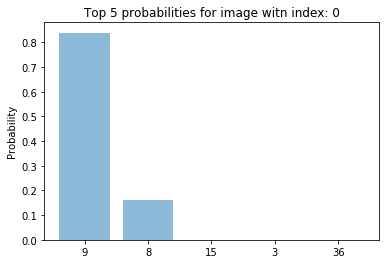

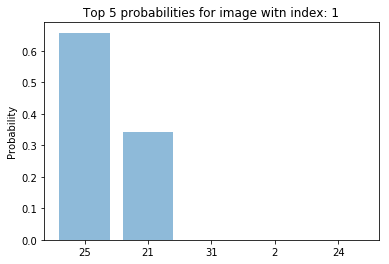

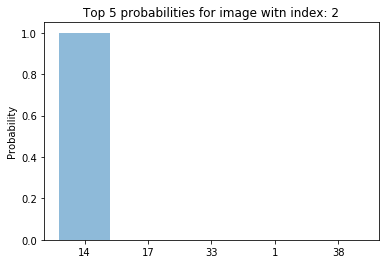

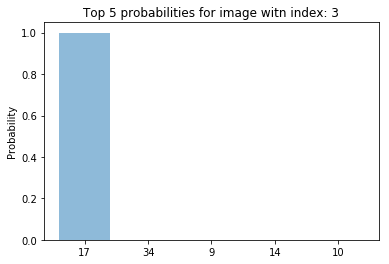

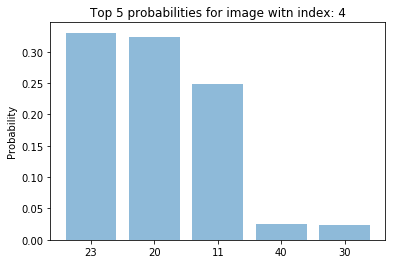

In [27]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

def visualize_prob(data, label, prediction_ind):   
    y_pos = np.arange(len(data))
    plt.bar(y_pos, data, align='center', alpha=0.5)
    plt.xticks(y_pos, label)
    plt.ylabel('Probability')
    plt.title('Top 5 probabilities for image witn index: %s'%prediction_ind) 
    plt.show()

values = TOPKV.values
indices = TOPKV.indices

print (values)
for ind,value in enumerate(values):
    visualize_prob(values[ind], indices[ind], ind)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** The model is certain in cases where the most probable label has much bigger probability than the others as shown in  images 1,3 and 4. The model would be uncertain in cases where the difference between the label candidates is small. In this case the image 5 is a very good example. Image 2 does not have a huge probability difference between the first and second candidate however this difference is significant and can not be considered as uncertain. Regarding the 5th image, the label predicted is wrong and in this case none of the candidate labels belong to the top 5. It is expected though since this image is taken under different angle than the ones that used to train the NN.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.